In [1]:
import pandas as pd 
from datetime import datetime
import numpy as np 
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [2]:
alc = pd.read_csv('alc.csv')
alc

,DD (grados),HR (% H.R.),Hour,Month,NO (µg/m³N),NO2 (µg/m³N),NOX (µg/m³N),O3 (µg/m³N),PM10 (µg/m³N),RS (W/m³),...,NO_lag1,NO2_lag1,NOX_lag1,PM10_lag1,O3_lag1,NO_lag2,NO2_lag2,NOX_lag2,PM10_lag2,O3_lag2
0,265.0,39.0,12,2.582276e-02,4.0,10.0,15.0,71.0,5.0,350.0,...,5.0,11.0,18.0,7.0,69.0,5.0,20.0,27.0,11.0,46.0
1,248.0,36.8,13,2.797466e-02,3.0,10.0,14.0,77.0,7.0,474.0,...,4.0,10.0,15.0,5.0,71.0,5.0,11.0,18.0,7.0,69.0
2,128.0,39.4,14,3.012655e-02,4.0,11.0,17.0,77.0,8.0,482.0,...,3.0,10.0,14.0,7.0,77.0,4.0,10.0,15.0,5.0,71.0
3,185.0,33.6,15,3.227844e-02,4.0,8.0,14.0,82.0,4.0,455.0,...,4.0,11.0,17.0,8.0,77.0,3.0,10.0,14.0,7.0,77.0
4,232.0,33.6,16,3.443033e-02,2.0,9.0,12.0,87.0,9.0,368.0,...,4.0,8.0,14.0,4.0,82.0,4.0,11.0,17.0,8.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17503,335.0,76.0,19,8.607594e-03,15.0,49.0,72.0,4.0,40.0,2.0,...,3.0,31.0,36.0,32.0,31.0,3.0,18.0,22.0,26.0,49.0
17504,282.0,81.0,20,6.455696e-03,39.0,56.0,115.0,3.0,50.0,1.0,...,15.0,49.0,72.0,40.0,4.0,3.0,31.0,36.0,32.0,31.0
17505,320.0,85.0,21,4.303797e-03,84.0,63.0,191.0,2.0,43.0,2.0,...,39.0,56.0,115.0,50.0,3.0,15.0,49.0,72.0,40.0,4.0
17506,148.0,87.0,22,2.151899e-03,80.0,57.0,180.0,2.0,41.0,1.0,...,84.0,63.0,191.0,43.0,2.0,39.0,56.0,115.0,50.0,3.0


In [3]:
x = alc[['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour']]
y = alc[['NO (µg/m³N)']]

In [4]:
x_train = x[:12000]
y_train = y[:12000]
x_test = x[12000:]
y_test = y[12000:]

In [5]:
lr = Lasso(alpha=-0.00001, normalize=True)
lr.fit(x_train,y_train)   

/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2922.555998294763, tolerance: 538.440832272
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=-1e-05, normalize=True)

In [6]:
y_pred = lr.predict(x_test)
y_pred

array([ 1.98641002,  1.32632345,  1.31954354, ..., 83.61948715,
       80.38754301, 44.45309189])

In [7]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = lr.score(x,y)
acc = lr.score(x_test,y_test)
print('R-squared:',score,'\n','RMSE: ',rmse,'\n','Accuracy: ',acc)

R-squared: 0.9995749704784068 
 RMSE:  0.428364787695593 
 Accuracy:  0.99941101131822


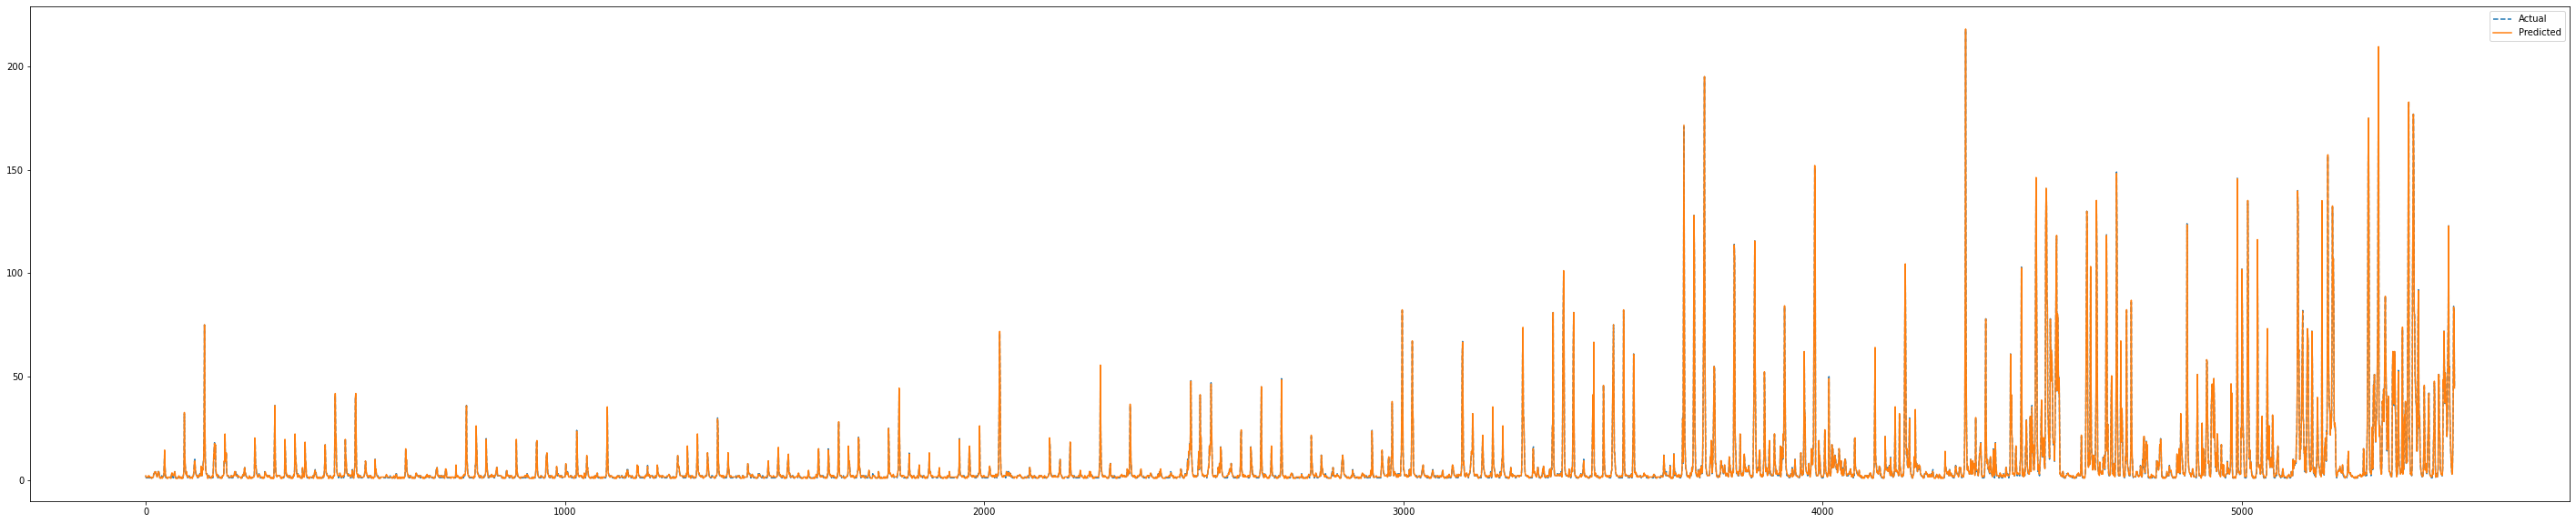

In [8]:
plt.figure(figsize=(50,10))
plt.plot(np.array(y_test),'--')
plt.plot(y_pred)
plt.legend(['Actual','Predicted'])

# Time Series

In [14]:
#list_x = [['NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','PM10 (µg/m³N)','Month','Hour'],['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','TMP (ºC)','HR (% H.R.)','DD (grados)','RS (W/m³)','VV (m/s)','Month','Hour']]
#list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
list_x = ['DD (grados)', 'HR (% H.R.)', 'Hour', 'Month', 'RS (W/m³)', 'TMP (ºC)', 'VV (m/s)', 'NO_roll_mean', 'NO2_roll_mean', 'NOX_roll_mean', 'PM10_roll_mean', 'O3_roll_mean', 'NO_lag1', 'NO2_lag1', 'NOX_lag1', 'PM10_lag1', 'O3_lag1', 'NO_lag2', 'NO2_lag2', 'NOX_lag2', 'PM10_lag2', 'O3_lag2']
list_y = ['NOX (µg/m³N)','NO (µg/m³N)','NO2 (µg/m³N)','SO2 (µg/m³N)','O3 (µg/m³N)','PM10 (µg/m³N)']
for i in np.arange(0,6):
    x = alc[list_x]
    y = alc[[list_y[i]]]
    x_train = x[5000:]
    y_train = y[5000:]
    x_test = x[:5000]
    y_test = y[:5000]
    lr = Lasso(alpha=0.0, normalize=True) 
    lr.fit(x_train,y_train)  
    y_pred = lr.predict(x_test)
#     importance = rf.feature_importances_
#     for j,v in enumerate(importance):
#         print('Feature: %0d, Score: %.5f' % (j,v))
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    score = lr.score(x,y)
    print(list_y[i],'\n R-squared:',score,'\n','RMSE: ',rmse)

<ipython-input-14-c40bd01a63ec>:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lr.fit(x_train,y_train)
/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3875408.8951552743, tolerance: 2691.6609894748963
  model = cd_fast.enet_coordinate_descent(
<ipython-input-14-c40bd01a63ec>:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lr.fit(x_train,y_train)
/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coor

NOX (µg/m³N) 
 R-squared: 0.71682730630203 
 RMSE:  19.01289834107696
NO (µg/m³N) 
 R-squared: 0.6523454393842933 
 RMSE:  9.11251455226861


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410344.619640387, tolerance: 386.5255214822514
  model = cd_fast.enet_coordinate_descent(
<ipython-input-14-c40bd01a63ec>:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lr.fit(x_train,y_train)
/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8099.240058769653, tolerance: 2.3228859440358156

NO2 (µg/m³N) 
 R-squared: 0.7854909194415376 
 RMSE:  7.959994000676157
SO2 (µg/m³N) 
 R-squared: 0.23413337366533427 
 RMSE:  1.3363360617113036


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479426.20209741435, tolerance: 1467.0113305235052
  model = cd_fast.enet_coordinate_descent(
<ipython-input-14-c40bd01a63ec>:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lr.fit(x_train,y_train)
/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


O3 (µg/m³N) 
 R-squared: 0.9309613338661383 
 RMSE:  9.91183644175777
PM10 (µg/m³N) 
 R-squared: 0.6452832889456226 
 RMSE:  7.638256855621493


/home/pritika/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 507344.64535805816, tolerance: 278.4101576114487
  model = cd_fast.enet_coordinate_descent(
